In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [ ]:

path = r"C:\mobile phone\dataset.csv"

try:
    df = pd.read_csv(path)
    print("✅ Data loaded successfully!")
except Exception as e:
    print(f"❌ Failed to load data: {e}")


✅ Data loaded successfully!


In [ ]:

df.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:

print("Shape:", df.shape)

print("\nMissing Values:\n", df.isnull().sum())

print("\nData Types:\n", df.dtypes)

if 'price_range' in df.columns:
    print("\nTarget Distribution:\n", df['price_range'].value_counts())
else:
    print("❌ The dataset does not contain a column named 'price_range'. Check your data!")


Shape: (2000, 21)

Missing Values:
 battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Data Types:
 battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17796\832846314.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='price_range', data=df, palette='Set2')


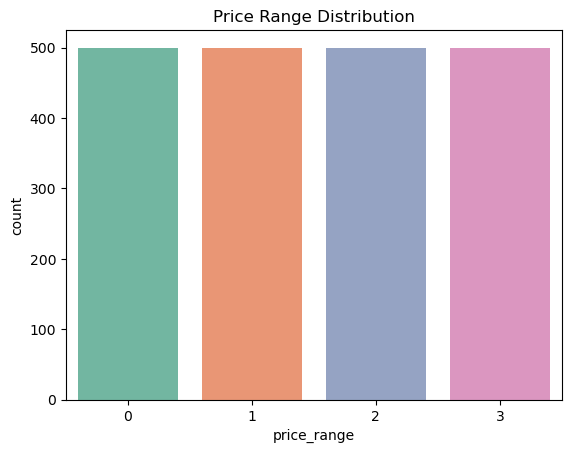

In [ ]:

if 'price_range' in df.columns:
    sns.countplot(x='price_range', data=df, palette='Set2')
    plt.title("Price Range Distribution")
    plt.show()


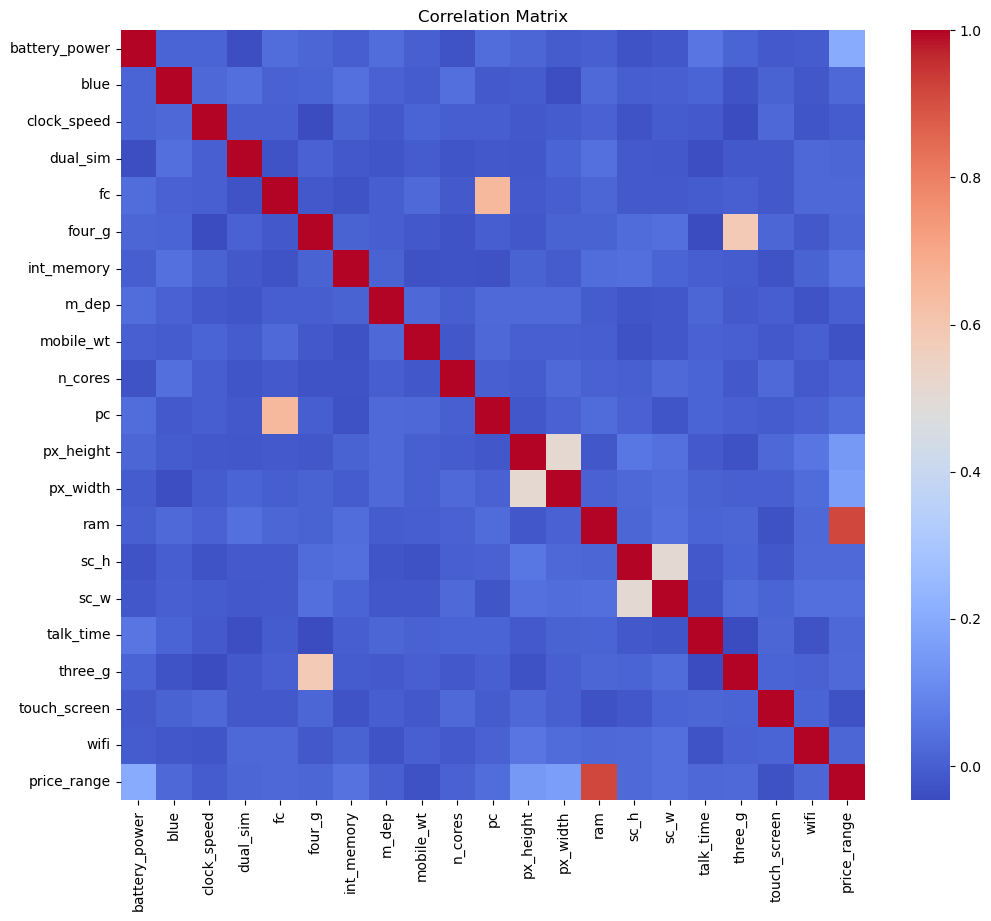

In [7]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [ ]:

X = df.drop('price_range', axis=1)
y = df['price_range']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [ ]:

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


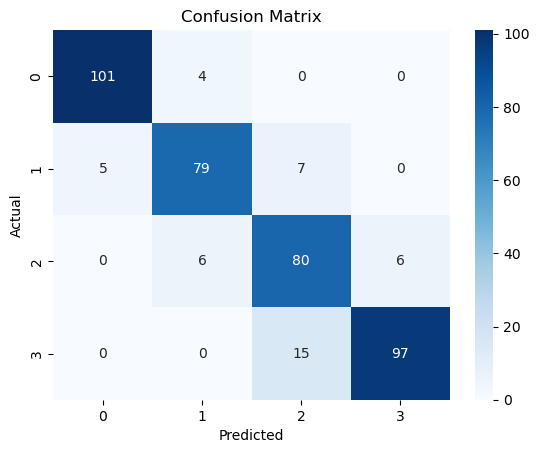


Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.89      0.87      0.88        91
           2       0.78      0.87      0.82        92
           3       0.94      0.87      0.90       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400


✅ Model Accuracy: 89.25%


In [ ]:

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

acc = accuracy_score(y_test, y_pred)
print(f"\n✅ Model Accuracy: {acc*100:.2f}%")


In [14]:

new_data = {
    col: [df[col].mean()] for col in df.columns if col != 'price_range'
}

new_df = pd.DataFrame(new_data)


new_scaled = scaler.transform(new_df)


pred = model.predict(new_scaled)
print(f"Predicted price range for example specs: {pred[0]}")


Predicted price range for example specs: 1
